Fatemeh Habibzadeh
Github: https://github.com/fhabibzadehh
Linkedin: https://www.linkedin.com/in/fatemeh-habibzadeh-heris/
Email: fhabibzadehh@gmail.com

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [56]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [57]:
df.shape

(11162, 17)

In [58]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


#Data preprocessing

In [ ]:
#target variable (deposit) transform into binary format 

df['target'] = df['deposit'].replace({'yes': 1, 'no': 0})
df.drop('deposit', axis=1, inplace=True)

/tmp/ipython-input-1937684108.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['deposit'].replace({'yes': 1, 'no': 0})


In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [61]:
categorical_column=['job','marital','education','default',
                      'housing','loan','contact', 'month','poutcome']
numerical_column=['age','balance','duration','campaign','pdays','previous']

In [62]:
print(df['target'].value_counts(normalize=True))

target
0    0.52616
1    0.47384
Name: proportion, dtype: float64


In [ ]:
# creating binary columns for each category
categorical_transform=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_transform

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [64]:
numerical_transform=StandardScaler()
numerical_transform

StandardScaler()

In [65]:
preprocessor=ColumnTransformer([
    ('categorical', categorical_transform, categorical_column),
    ('numerical', numerical_transform, numerical_column)
])
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'poutcome']),
                                ('numerical', StandardScaler(),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'pdays', 'previous'])])

In [66]:
#class weight
model = LogisticRegression(solver='liblinear',C=1.0,class_weight='balanced',random_state=35)

#train/test split

In [67]:
x = df.drop('target',axis=1)
y = df['target'].values

In [68]:
# 80% train
# 20% test
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=35)

#Logistic Regression

In [69]:
model_pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', model)]
)

In [70]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('numerical', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=35,
                                    solver='liblinear'))])

# test

In [71]:
y_pred = model_pipeline.predict(x_test)
y_pred_proba = model_pipeline.predict_proba(x_test)[:, 1]

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1183
           1       0.81      0.82      0.81      1050

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [73]:
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

ROC AUC Score: 0.9028


In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[985, 198],
       [193, 857]])

<Axes: >

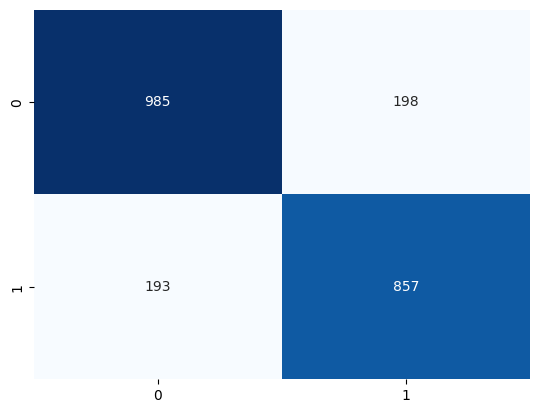

In [75]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

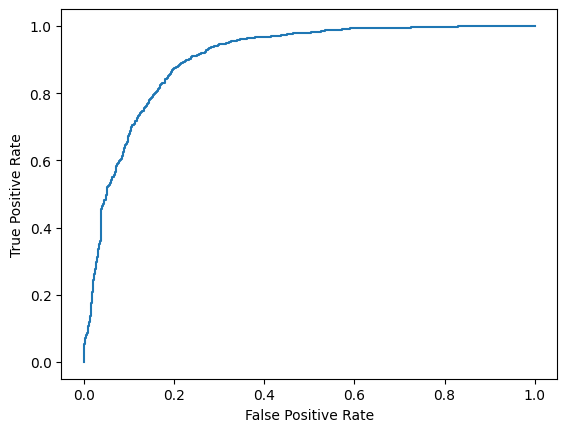

In [54]:
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#Analyze

In [88]:
y_train_pred = model_pipeline.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
'''Train accuracy is 0.8307 and test accuracy is 0.8249.
The difference is very small (less than 1%).
So the model is neither overfitting nor underfitting. It generalizes well.'''

Train Accuracy: 0.8307761227461082
Test Accuracy: 0.8248992386923422


'Train accuracy is 0.8307 and test accuracy is 0.8249.\nThe difference is very small (less than 1%).\nSo the model is neither overfitting nor underfitting. It generalizes well.'

In [90]:
ohe = model_pipeline.named_steps['preprocessor'].named_transformers_['categorical']
cat_features = ohe.get_feature_names_out(categorical_column)
all_features = list(cat_features) + numerical_column

coefs = model_pipeline.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'feature': all_features,
    'coefficient': coefs,
    'abs_coeff': np.abs(coefs)
}).sort_values('abs_coeff', ascending=False)

coef_df.head(20)

,feature,coefficient,abs_coeff
35,month_mar,1.926563,1.926563
46,duration,1.897612,1.897612
42,poutcome_success,1.748147,1.748147
32,month_jan,-1.173616,1.173616
38,month_oct,1.051359,1.051359
30,month_dec,1.043101,1.043101
33,month_jul,-1.035335,1.035335
37,month_nov,-0.962643,0.962643
39,month_sep,0.907748,0.907748
27,contact_unknown,-0.886215,0.886215


Features such as duration, poutcome_success, and month_mar have the strongest impact on the model.
They show the highest absolute coefficients.

Using class_weight='balanced' helps the model handle the minority class (deposit=yes) more effectively while maintaining stable overall performance.